# Neural Network Visualization 

First, we implement the Artificial Neural Network. For easy of implementation, we design an ANN with 1 input, 1 hidden layer and 1 output layer. The output layer contain only 1 output neuron.

Because the output has only 1 neuron so we use the **Binary Cross Entropy (BCE)** as the loss function instead of Cross Entropy (CE).

In [167]:
from keras.backend import learning_phase
# Dense : densely-connected Neural network layer (Lớp NN liên kết đầy đủ)
# Input : is used to instantiate a Keras tenso (Khởi tạo Keras Tensor)
from keras.layers import Input, Dense 
# Model : groups layers into an object with training and inference features (Nhóm các layers thành một object để train và suy luận)
from keras import Model 
from keras.models import load_model
import tensorflow as tf

# NEURAL NETWORK 
class NeuralNetwork:
  # Hàm khởi tạo model
  def __init__(self):
    return None 

  def build(self, input_dim, output_dim): # Hàm build model: input_dim: số chiều đầu vào, output_dim: số chiều đầu ra 
    input = Input(shape=(input_dim,))
    hidden1 = Dense(8, use_bias = True, activation='sigmoid')(input) # Khởi tạo lớp ẩn thứ nhất có 8 layers 
    output = Dense(output_dim, use_bias = True, activation='sigmoid')(hidden1) # Lớp thứ 2 có output_dim layers 
    # Hàm kích hoạt là sigmoid : hàm phi tuyến với đầu vào là số thực, đầu ra trong khoảng [0, 1]

    self.model = Model(input, output)
    return self.model

  def train(self, x_train, y_train):
    # Note that, in the optimizer, if we dont use the 'momentum' option, the training process will be stucked and cannot converge
    # Optimizer : nếu không sử dụng momentum, quá trình train sẽ bị kẹt và không thể hội tụ
    otp = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9) 
    # Stochastic Gradient Descent
    # SGD: là một biến thể của Gradient Descent, cập nhật trọng số cho từng điểm trong mỗi epoch => giảm số vòng lặp
  
    self.model.compile(optimizer=otp, loss=tf.keras.losses.BinaryCrossentropy())
    # Binary Cross Entropy Loss : sử dụng cho bài toán phân loại nhị phân, nhận đầu vào [0,1]

    return self.model.fit(x_train, y_train, batch_size=64, epochs=500)

  def save(self, model_file):
    return self.model.save(model_file)

  def load(self, model_file)  :
    self.model = load_model(model_file)

  def summary(self):
    self.model.summary()

  def predict(self, x_test):
    return self.model.predict(x_test)


##In this experiment, we use a non-linear separable trainning samples and visualize a sample data using matplotlib. 

The trainning samples are two rings with the same center.

(-1.1601067271060412,
 1.1937830983377988,
 -1.1483487932987728,
 1.1190189629555753)

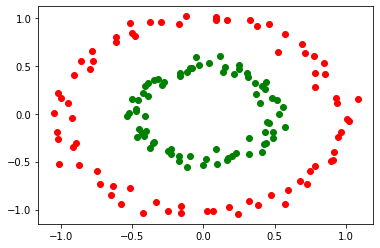

In [168]:
from sklearn import manifold, datasets
import matplotlib.pyplot as plt 

n_samples = 150
n_components = 2
perplexities = [5, 30, 50, 100]

# datasets.make_circles : tạo nên vòng tròn lớn chứa vòng tròn nhỏ bên trong, 2D
X_train, Y_train = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)

#X_train : các điểm dữ liệu được tạo ra 
#Y_train : nhãn 0,1 cho thành viên của mỗi mẫu
# Gán giá trị cho red là True/False ngược với giá trị của Y(0 hoặc 1). 
# == 0 : chuyển đổi ngược lại (VD: 0 => True, 1 => False)
# == 1 : chuyển đổi xuôi (VD: 1 => True, 0 => False)
red = Y_train == 0
green = Y_train == 1
Y_train = Y_train.astype(float) # Chuyển đổi giá trị của Y sang số thực


plt.plot(X_train[red, 0], X_train[red, 1], "ro")
plt.plot(X_train[green, 0], X_train[green, 1], "go")
plt.axis("tight") # tọa độ các điển biên của các giá trị trên 2D


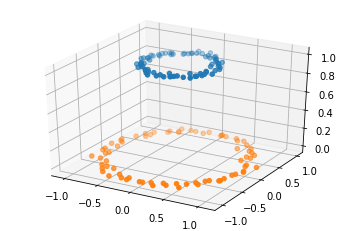

In [169]:
# Visualization trên không gian 3D
plt3d = plt.figure().gca(projection='3d')
plt3d.scatter(X_train[green,0], X_train[green,1], Y_train[green])
plt3d.scatter(X_train[red,0],X_train[red,1],Y_train[red])

## Initialize and Build the model.

In [170]:
nn_model = NeuralNetwork()
nn_model.build(2, 1)
#nn_model.model.layers[1].get_weights()

### Then, train & visualize the loss values

In [171]:
hist = nn_model.train(X_train, Y_train)

Epoch 1/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6998
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6951
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6929
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6951
Epoch 5/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6964
Epoch 6/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6946
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 0.6947
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6931
Epoch 9/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6940
Epoch 10/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6931
Epoch 11/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6935
Epoch 12/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6925
Epoch 13/500
3/3 [==============================] - 0s 3ms/st

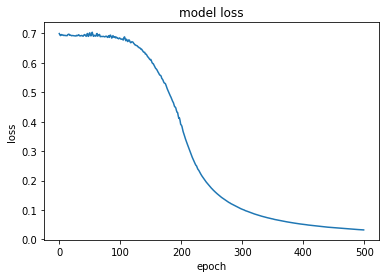

In [172]:
# Visualization hàm Loss
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [173]:
# layer 1 gồm 1 mảng 16 parameters và 1 mảng 8 bias ứng với 8 node
nn_model.model.layers[1].get_weights()

[array([[ 4.1389804 ,  0.67956215, -0.5604311 , -1.0138804 , -1.7558348 ,
         -7.1003532 ,  6.627923  ,  0.6377897 ],
        [ 4.493091  ,  0.39556754,  0.4451679 , -6.287634  ,  1.6016215 ,
         -0.5568656 , -3.862505  , -4.7626786 ]], dtype=float32),
 array([-3.5695777 , -0.13156548,  0.6601561 , -3.7144    , -0.80252177,
         4.1264577 ,  4.135853  , -2.435224  ], dtype=float32)]

## After training, we use the model to predict with test data on grid and draw the weak classifiers given from the parameters of hidden layer.

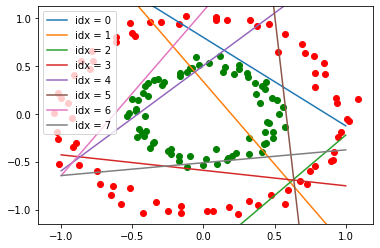

In [174]:
import numpy as np

# Get the trained parameters for visualization
theta = nn_model.model.layers[1].get_weights()
bias = theta[1]
param = theta[0]

# Plot red and blue points
plt.plot(X_train[red, 0], X_train[red, 1], "ro")
plt.plot(X_train[green, 0], X_train[green, 1], "go")
plt.axis("tight")

for idx in range(8):
  # Plot hyperplane
  # (150, 2)   (2, 8)
  # x1*w1 + x2*w2 + bias = 0 // Công thức đoạn thẳng bằng 2 điểm
  # X2 = (-bias - x1*w1)/w2

  x1 = [-1, 1] # 2 đầu mút của đoạn thẳng vẽ trên ảnh
  x2 = (-bias[idx]-param.T[idx][0]*x1[0])/param.T[idx][1] # Tính x2, x3
  x3 = (-bias[idx]-param.T[idx][0]*x1[1])/param.T[idx][1]
  plt.plot(x1,[x2,x3], label = f'idx = {idx}')
  plt.legend(loc='upper left')

plt.show()
